In [1]:
from framsfiles import reader as framsreader
from emd_on_voxels import VoxelsEMD
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import time
import json

In [2]:
path = '/home/adam/Framsticks/Framsticks50rc19'


In [3]:
def printModel(genotype):
    voxels = e.getVoxels(genotype)
    drawModel(voxels)
    
def printModels(genotype1, genotype2):
    voxels1 = e.getVoxels(genotype1)
    voxels2 = e.getVoxels(genotype2)
    drawModel2(voxels1,voxels2)

In [5]:
walking_gen = framsreader.load(path + "/data/walking.gen", "gen file")
f4_best_gen = framsreader.load(path + "/data/encoding_f4_best.gen", "gen file")

list_of_genos_walking = [x['genotype'] for x in walking_gen]
list_of_genos_f4_best_gen = [x['genotype'] for x in f4_best_gen]


number_of_repetition = 10

density_param = [5,10,15,20,25]


# Testing Time 

In [6]:
time_per_density_walking_gen = {}

all_times_walking_gen = []
for d in density_param:
    e = VoxelsEMD(path,density=d)
    start_time = time.process_time()
    part_time = []
    for i in range(number_of_repetition):
        l_time = time.process_time()
        e.getDissimilarityMatrix(list_of_genos_walking)
        print("T:",(time.process_time() - l_time))
        part_time.append((time.process_time() - l_time))
    all_times_walking_gen.append(part_time)
    time_per_density_walking_gen[d] =(time.process_time() - start_time)/number_of_repetition

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 5.235896799
T: 5.2165804069999995
T: 5.151667497000002
T: 5.247377051999997
T: 5.230858688000001
T: 5.4532636599999975
T: 5.293200644999999
T: 5.257952121000002
T: 5.232355196
T: 5.281089863000005
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 8.772821450999999
T: 8.538087124999997
T: 8.474815602999996
T: 8.698304291
T: 8.649361197000005
T: 8.801193233000006
T: 8.728206963000005
T: 8.605608525000008
T: 9.022178961000009
T: 8.711144106999996
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 17.041260857999987
T: 16.98317269200001
T: 17.150982897999995


In [7]:
all_times_walking_gen

[[5.2360136079999995,
  5.216697716,
  5.151753118000002,
  5.247455689999999,
  5.230936463999999,
  5.453380117999998,
  5.293284092,
  5.258028433999996,
  5.2330291110000005,
  5.281167890000006],
 [8.773481539999999,
  8.538159209999996,
  8.474944834999988,
  8.698383559999996,
  8.649435857,
  8.801300365000003,
  8.728281312000007,
  8.605682043000002,
  9.022288486000008,
  8.711219177999993],
 [17.041368981000005,
  16.983883768,
  17.151095949999984,
  17.002798938000012,
  16.992153478999995,
  16.698427400000014,
  17.046442380000002,
  17.082855913000003,
  17.142257094,
  16.840891345999978],
 [32.52358639299996,
  32.46821637300002,
  32.44724111700003,
  32.267965704000005,
  32.41048301699999,
  32.675607720000016,
  33.07129742899997,
  33.856728868000005,
  33.34321479699997,
  34.24117941099996],
 [58.072123548000036,
  58.291216597000016,
  56.55590960500001,
  59.476307257999906,
  59.93586115400001,
  58.498941078999906,
  58.67357888900017,
  57.413596693000045

In [8]:
time_per_density_walking_gen

{5: 5.2601780484,
 10: 8.7003210378,
 15: 16.9982206627,
 20: 32.9305550113,
 25: 58.16558078729999}

In [9]:
density_param = [5,10,15,20,25]
time_per_density_f4_best_gen = {}
all_times_f4_best_gen =[]
for d in density_param:
    e = VoxelsEMD(path,density=d)
    start_time = time.process_time()
    part_time = []
    for i in range(number_of_repetition):
        local_time = time.process_time()
        e.getDissimilarityMatrix(list_of_genos_f4_best_gen)
        print("T:",(time.process_time() - local_time))
        part_time.append((time.process_time() - local_time))
    all_times_f4_best_gen.append(part_time)
    time_per_density_f4_best_gen[d] =(time.process_time() - start_time)/number_of_repetition

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 4.620151015999909
T: 4.612567576999936
T: 4.580875542000058
T: 4.554426208999985
T: 4.68171329200004
T: 4.629913482999882
T: 4.599946460999945
T: 4.582262600999911
T: 4.592603592999922
T: 4.6912329150000005
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 29.240781051999875
T: 28.955038375999948
T: 29.189800333999983
T: 28.777496810999992
T: 29.145148259000052
T: 29.10105039200016
T: 29.098928828999988
T: 29.240340752999828
T: 29.414682591999963
T: 29.203087905000075
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 94.31432445099995
T: 95.8660175
T: 94

In [10]:
time_per_density_f4_best_gen

{5: 4.614670599300007,
 10: 29.136930008600007,
 15: 93.6098188935,
 20: 220.55265958460004,
 25: 443.330499726}

In [11]:
time_per_density_walking_gen

{5: 5.2601780484,
 10: 8.7003210378,
 15: 16.9982206627,
 20: 32.9305550113,
 25: 58.16558078729999}

In [12]:
time_per_density = pd.DataFrame([time_per_density_f4_best_gen,time_per_density_walking_gen])
# time_per_density.to_csv("time_per_density_f4_walk.csv")

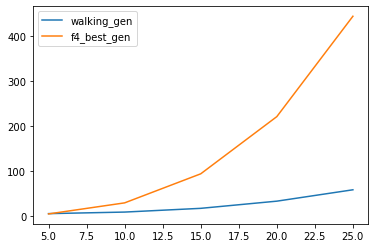

In [13]:
plt.plot(*zip(*time_per_density_walking_gen.items()),label = "walking_gen")
plt.plot(*zip(*time_per_density_f4_best_gen.items()),label = "f4_best_gen")
plt.legend()
plt.show()

In [14]:
all_times_f4_best_gen

[[4.620230355000103,
  4.6126430990000244,
  4.5809542800000145,
  4.554507371,
  4.681841733000056,
  4.6300358920000235,
  4.600061556000128,
  4.58238393900001,
  4.592704012000013,
  4.691308596999988],
 [29.240859438999905,
  28.955140998999923,
  29.18987673799984,
  28.77757815399991,
  29.145225313000083,
  29.10116919500001,
  29.099762401999897,
  29.241106629999877,
  29.41475983700002,
  29.203798126000038],
 [94.31441086300015,
  95.8664691670001,
  94.53944194099995,
  94.91245362899986,
  95.44555379899998,
  94.70925926100017,
  90.48810419600022,
  91.0723124240003,
  92.19964121300018,
  92.55052306599964],
 [216.6133298929999,
  220.7477822640003,
  219.941307221,
  221.19768799800022,
  220.36885326300035,
  219.01131365399988,
  224.46278199100016,
  222.16272901599996,
  221.8268159549998,
  219.1939666770004],
 [437.5630152880003,
  439.48454376799964,
  439.74936613499995,
  430.2253397049999,
  434.6373898800002,
  447.31850436199966,
  446.7087438570006,
  449

In [15]:
pd.DataFrame(all_times_f4_best_gen).to_csv("all_times_f4_best_gen.csv")
pd.DataFrame(all_times_walking_gen).to_csv("all_times_walking_gen.csv")


In [18]:
steps_param = [1,3,5,7,10]


time_per_steps_walking_gen = {}
all_times_walking_gen_steps = []
for d in steps_param:
    e = VoxelsEMD(path,steps=d)
    start_time = time.process_time()
    temp_time = []
    for i in range(number_of_repetition):
        local_time = time.process_time()
        e.getDissimilarityMatrix(list_of_genos_walking)
        print("T:",(time.process_time() - local_time))
        temp_time.append((time.process_time() - local_time))
    all_times_walking_gen_steps.append(temp_time)
    time_per_steps_walking_gen[d] =(time.process_time() - start_time)/number_of_repetition

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 4.362135143999694
T: 4.823035119999986
T: 4.624684847000026
T: 4.463229279001098
T: 4.559214930000962
T: 4.66751967700111
T: 4.7844401900001685
T: 4.630741779001255
T: 4.426048289999017
T: 4.512796885999705
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 8.822660972999074
T: 8.920308793000004
T: 9.300347795000562
T: 9.396776690000479
T: 9.580397654999615
T: 9.382855385998482
T: 9.245190688001458
T: 9.207275666998612
T: 9.25359220700011
T: 9.19626321999931
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 65.4528277089994
T: 65.93566769300014
T: 62.7461

KeyboardInterrupt: 

In [19]:
time_per_steps_walking_gen

{1: 4.585556084800009,
 3: 9.230700397500005,
 5: 63.30359027499999,
 7: 275.574215192}

In [20]:
time_per_stepsf4_best_gen = {}
all_times_stepsf4_best_gens = []
for d in steps_param:
    e = VoxelsEMD(path,steps=d)
    start_time = time.process_time()
    temp_time=[]
    for i in range(number_of_repetition):
        local_time =time.process_time()
        e.getDissimilarityMatrix(list_of_genos_f4_best_gen)
        print("T:",(time.process_time() - local_time))
        temp_time.append((time.process_time() - local_time))
    all_times_stepsf4_best_gens.append(temp_time)
    time_per_stepsf4_best_gen[d] =(time.process_time() - start_time)/number_of_repetition

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 30.360455946000002
T: 31.490773773999535
T: 32.983811095997225
T: 31.849441475002095
T: 32.14891916800116
T: 32.352585213000566
T: 32.28862626800037
T: 31.729090533997805
T: 31.97221689000071
T: 33.620247790000576
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 33.54820547399868
T: 34.998972262997995
T: 34.583154732001276
T: 34.90583569199953
T: 34.538185369998246
T: 34.74782648399923
T: 33.716272990001016
T: 34.43537335599831
T: 34.416802944000665
T: 33.721888325999316
Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

T: 45.58679590099928
T: 45.729403438

In [21]:
time_per_stepsf4_best_gen

{1: 32.0799287627,
 3: 34.3614785552003,
 5: 43.79460008220012,
 7: 74.43153495779988,
 10: 171.1360868502001}

In [22]:
time_per_steps = pd.DataFrame([time_per_stepsf4_best_gen,time_per_steps_walking_gen])
time_per_steps.to_csv("time_per_steps_f4_walk.csv")

In [23]:
pd.DataFrame(all_times_stepsf4_best_gens).to_csv("all_times_f4_best_gens_steps.csv")
pd.DataFrame(all_times_walking_gen_steps).to_csv("all_times_walking_gen_steps.csv")


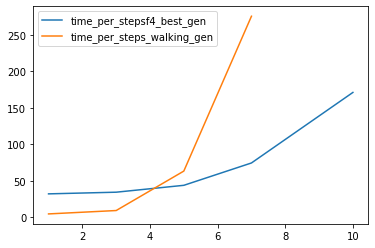

In [24]:
plt.plot(*zip(*time_per_stepsf4_best_gen.items()),label ="time_per_stepsf4_best_gen" )
plt.plot(*zip(*time_per_steps_walking_gen.items()),label = "time_per_steps_walking_gen")
plt.legend()
plt.show()

# Testing precision

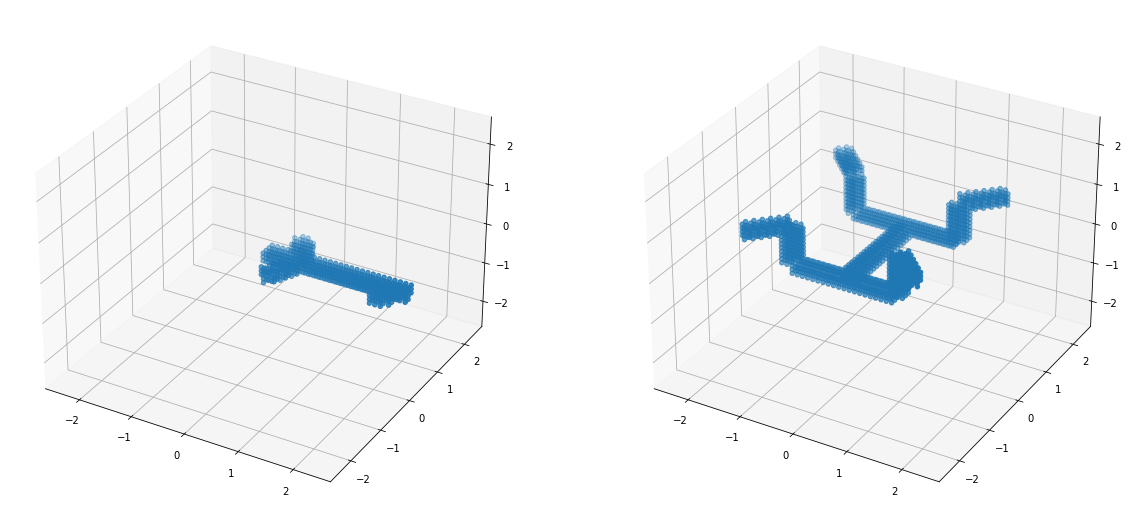

In [25]:
printModels(list_of_genos_walking[52],list_of_genos_walking[51])


In [26]:
steps_param = [1,3,5,7,10]
time_per_steps_ex = {}
number_of_repetition = 10
emd_for_steps = []
for d in steps_param:
    e = VoxelsEMD(path,steps=d)
    start_time = time.process_time()
    emd_v=0
    for i in range(number_of_repetition):
        emd_v = e.calculateEMDforGeno(list_of_genos_walking[1],list_of_genos_walking[52])
    time_per_steps_ex[d] =(time.process_time() - start_time)/number_of_repetition
    emd_v = e.calculateEMDforGeno(list_of_genos_walking[51],list_of_genos_walking[52])
    emd_for_steps.append(emd_v)


Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data



In [27]:
time_per_stepsf4_best_ge

NameError: name 'time_per_stepsf4_best_ge' is not defined

In [ ]:
emd_for_steps

In [ ]:
time_per_density_ex = {}
number_of_repetition = 10
emd_for_density = []

for d in density_param:
    e = VoxelsEMD(path,density=d)
    start_time = time.process_time()
    emd_v=0
    for i in range(number_of_repetition):
        emd_v = e.calculateEMDforGeno(list_of_genos_walking[51],list_of_genos_walking[52])
    
    time_per_density_ex[d] =(time.process_time() - start_time)/number_of_repetition
    emd_v = e.calculateEMDforGeno(list_of_genos_walking[51],list_of_genos_walking[52])
    emd_for_density.append(emd_v)


In [ ]:
time_per_density_ex

In [ ]:
emd_for_density